### Importing labraries

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import matplotlib.cm as cm # Matplotlib and associated plotting modules
import matplotlib.colors as colors
from geopy.geocoders import Nominatim # import geocoder
from sklearn.cluster import KMeans # import k-means from clustering stage
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Load Toronto estates and venues data

In [2]:
Tor_Est = pd.read_csv("Toronto_Estate.csv")
Tor_Ven = pd.read_csv("Toronto_Venues.csv")

In [3]:
Tor_Est.head()

,Postal Code,Address,Home Type,Price,Latitude,Longitude
0,M9A,111 Poplar Heights Dr,4 beds4 baths,1650000,43.679590,-79.534897
1,M9B,106 Smithwood Dr,4 + 2 beds5 baths,2480000,43.639343,-79.549795
2,M5B,2612 - 210 Victoria St,1 beds1 baths,499000,44.227773,-76.502763
3,M4M,1007 - 1190 Dundas St E,0 beds1 baths,578800,43.497704,-79.708615
4,M5R,3002 - 32 Davenport Rd,2 + 1 beds2 baths,15880000,43.673388,-79.389952


In [4]:
Tor_Ven.head()

,index,Postal Code,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,M9A,43.667856,-79.532242,Java Joe's Village Cafe,43.662461,-79.532054,Café
1,1,M9A,43.667856,-79.532242,St Georges Golf and Country Club,43.674395,-79.537142,Golf Course
2,2,M9A,43.667856,-79.532242,"Ma Maison, Boulangerie - Patisserie - Traiteur",43.659490,-79.513624,French Restaurant
3,3,M9A,43.667856,-79.532242,James Gardens Park,43.671256,-79.513338,Garden
4,4,M9A,43.667856,-79.532242,Lambton Golf & Country Club,43.667522,-79.507117,Golf Course


In [5]:
Tor_Est.groupby("Postal Code").count()

,Address,Home Type,Price,Latitude,Longitude
Postal Code,,,,,
M1N,8,8,8,8,8
M2J,1,1,1,1,1
M3B,5,5,5,5,5
M3C,2,2,2,2,2
M4B,1,1,1,1,1
M4C,21,21,21,21,21
M4E,20,20,20,20,20
M4G,2,2,2,2,2
M4J,13,13,13,13,13


In [6]:
Tor_Ven.groupby("Postal Code")[['Venue', 'Venue Category']].count()

,Venue,Venue Category
Postal Code,,
M1N,65,65
M2J,86,86
M3B,86,86
M3C,86,86
M4B,86,86
M4C,86,86
M4E,86,86
M4G,86,86
M4J,86,86


### Adding bedrooms and bathrooms information to dataframe

In [7]:
home_types = Tor_Est['Home Type'].tolist()
bedrooms = []
bathrooms = []

for hometype in home_types:
    bedsindex = hometype.index("beds")
    bathindex = hometype.index("baths")
    bedrooms.append(hometype[0:bedsindex])
    bathrooms.append(hometype[bedsindex+4:bathindex])
Tor_Est.drop(columns='Home Type', axis=1)

Tor_Est.head()

,Postal Code,Address,Home Type,Price,Latitude,Longitude
0,M9A,111 Poplar Heights Dr,4 beds4 baths,1650000,43.679590,-79.534897
1,M9B,106 Smithwood Dr,4 + 2 beds5 baths,2480000,43.639343,-79.549795
2,M5B,2612 - 210 Victoria St,1 beds1 baths,499000,44.227773,-76.502763
3,M4M,1007 - 1190 Dundas St E,0 beds1 baths,578800,43.497704,-79.708615
4,M5R,3002 - 32 Davenport Rd,2 + 1 beds2 baths,15880000,43.673388,-79.389952


In [8]:
Tor_Est.insert(2,column="Bedroom",value=bedrooms)
Tor_Est.insert(3,column="Bathroom",value=bathrooms)
Tor_Est.head()

,Postal Code,Address,Bedroom,Bathroom,Home Type,Price,Latitude,Longitude
0,M9A,111 Poplar Heights Dr,4,4,4 beds4 baths,1650000,43.679590,-79.534897
1,M9B,106 Smithwood Dr,4 + 2,5,4 + 2 beds5 baths,2480000,43.639343,-79.549795
2,M5B,2612 - 210 Victoria St,1,1,1 beds1 baths,499000,44.227773,-76.502763
3,M4M,1007 - 1190 Dundas St E,0,1,0 beds1 baths,578800,43.497704,-79.708615
4,M5R,3002 - 32 Davenport Rd,2 + 1,2,2 + 1 beds2 baths,15880000,43.673388,-79.389952


### Pick the home types of the estates satisfy my requirements

In [9]:
Tor_Est['Bedroom'].unique()

array(['4 ', '4 + 2 ', '1 ', '0 ', '2 + 1 ', '3 + 1 ', '1 + 1 ', '2 ',
       '3 ', '4 + 1 ', '5 ', '1 + 2 ', '3 + 3 ', '3 + 2 ', '9 ', '5 + 3 ',
       '6 + 2 ', '5 + 1 ', '6 ', '6 + 3 ', '2 + 2 ', '8 + 2 ', '6 + 1 ',
       '9 + 3 ', '4 + 4 ', '7 + 2 ', '8 ', '5 + 2 ', '7 ', '9 + 6 ',
       '8 + 3 ', '7 + 1 ', '4 + 3 ', '9 + 2 ', '8 + 1 '], dtype=object)

### Median of estates' price

In [10]:
df_Selected_Est = pd.concat([Tor_Est[Tor_Est['Bedroom'] == '3 '], Tor_Est[Tor_Est['Bedroom'] == '3 + 3 '], Tor_Est[Tor_Est['Bedroom'] == '3 + 2 ']], axis=0, sort=False).reset_index().drop(columns=['index', 'Home Type'])
df_Selected_Est.head()

,Postal Code,Address,Bedroom,Bathroom,Price,Latitude,Longitude
0,M5V,905 - 90 Queens Wharf Rd,3,2,999999,43.638642,-79.399078
1,M5B,310 - 365 Church St,3,2,1228000,43.660811,-79.378788
2,M8Y,11A Brussels St,3,4,1599988,43.626872,-79.492181
3,M6N,1903 Davenport Rd,3,2,999000,43.670303,-79.454922
4,M5T,603 - 297 College St,3,2,1500000,43.657516,-79.401413


In [11]:
Selected_Est_Median = df_Selected_Est.groupby('Postal Code').median().drop(columns =['Latitude', 'Longitude'])
Selected_Est_Median.head()

,Price
Postal Code,
M1N,1054990.0
M3B,699000.0
M3C,699000.0
M4C,998800.0
M4E,1107495.0


### Preparing dataframe for K-mean clustering

In [12]:
# one hot encoding
Tor_onehot = pd.get_dummies(Tor_Ven[['Venue Category']], prefix="", prefix_sep="")

# add postal code column back to dataframe
Tor_onehot['Postal Code'] = Tor_Ven['Postal Code'] 

# move Postal Code column to the first column
Postalcodeidx = list(Tor_onehot.columns).index('Postal Code')
fixed_columns = [Tor_onehot.columns[Postalcodeidx]] + list(Tor_onehot.columns[0:Postalcodeidx]) + list(Tor_onehot.columns[Postalcodeidx+1::])
Tor_onehot = Tor_onehot[fixed_columns]

### Grouping rows by Postal Code and taking the mean of the frequency of occurrence of each category
### Create the top 10 most common venues of Dataframe by each postal code area

In [13]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [14]:
Tor_grouped = Tor_onehot.groupby("Postal Code").mean().reset_index()

num_top_venues = 10

indicators = ["st", "nd", "rd"]

# create columns according to number of top venues
columns = ["Postal Code"]
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
postalcode_venues_sorted = pd.DataFrame(columns=columns)
postalcode_venues_sorted['Postal Code'] = Tor_grouped['Postal Code']

for ind in np.arange(Tor_grouped.shape[0]):
    postalcode_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Tor_grouped.iloc[ind, :], num_top_venues)


### Cluster Neighborhood
####    The cluster is divided to 6 Clusters for analyze

In [15]:
# set number of clusters
kclusters = 6

Tor_grouped_clustering = Tor_grouped.drop('Postal Code', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Tor_grouped_clustering)

# add clustering labels
postalcode_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

postalcode_venues_sorted

,Cluster Labels,Postal Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3,M1N,Coffee Shop,Park,Bakery,Sandwich Place,Ice Cream Shop,Beer Store,Burger Joint,Pub,Grocery Store,Discount Store
1,3,M2J,Coffee Shop,Chinese Restaurant,Pharmacy,Middle Eastern Restaurant,Bakery,Restaurant,Sandwich Place,Furniture / Home Store,Falafel Restaurant,Hotel
2,3,M3B,Japanese Restaurant,Restaurant,Coffee Shop,Burger Joint,Supermarket,Pizza Place,Italian Restaurant,Asian Restaurant,Fried Chicken Joint,Discount Store
3,3,M3C,Coffee Shop,Gym,Japanese Restaurant,Restaurant,Indian Restaurant,Pharmacy,Burger Joint,Afghan Restaurant,Middle Eastern Restaurant,Grocery Store
4,3,M4B,Coffee Shop,Sandwich Place,Pharmacy,Grocery Store,Pizza Place,Park,Ice Cream Shop,Fast Food Restaurant,Thai Restaurant,Bank
5,3,M4C,Coffee Shop,Gastropub,Fast Food Restaurant,Bakery,Café,Grocery Store,Gym / Fitness Center,Indian Restaurant,Japanese Restaurant,Middle Eastern Restaurant
6,5,M4E,Beach,Coffee Shop,Pub,Park,Breakfast Spot,Ice Cream Shop,BBQ Joint,Indian Restaurant,Bakery,Bar
7,5,M4G,Park,Indian Restaurant,Bakery,Grocery Store,Sushi Restaurant,Coffee Shop,Café,Gym,Dog Run,Thai Restaurant
8,1,M4J,Café,Greek Restaurant,Bakery,Coffee Shop,Park,Cocktail Bar,American Restaurant,Gastropub,Italian Restaurant,Cosmetics Shop
9,1,M4K,Greek Restaurant,Café,Park,Bakery,Ice Cream Shop,Vietnamese Restaurant,Italian Restaurant,Diner,Pizza Place,Cocktail Bar


### Function of forming dataframe with median price of estates in the cluster

In [16]:
def clusters_estates(estates, medians, venues, cluster):
    
    Cluster_Est_df = pd.DataFrame(columns = estates.columns.tolist())
    Cluster_Median = pd.DataFrame(columns = medians.columns.tolist())
    cluster_venues = venues.loc[venues['Cluster Labels'] == cluster]
    postals = cluster_venues['Postal Code']
    
    for postal in postals:
        Cluster_Est_df = pd.concat([Cluster_Est_df, estates[estates['Postal Code'] == postal]], axis=0, sort=False)
        Cluster_Median = pd.concat([Cluster_Median, medians[medians.index == postal]], axis=0, sort=False)
    
    return Cluster_Est_df.reset_index(drop=True), Cluster_Median

### Cluster 1

In [17]:
postalcode_venues_sorted.loc[postalcode_venues_sorted['Cluster Labels'] == 0]

,Cluster Labels,Postal Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,0,M4M,Coffee Shop,Park,Brewery,Pizza Place,Café,Diner,Bakery,French Restaurant,Vietnamese Restaurant,Ice Cream Shop
19,0,M4X,Coffee Shop,Park,Gastropub,Diner,Japanese Restaurant,Restaurant,Thai Restaurant,Bookstore,Historic Site,Hotel
20,0,M4Y,Coffee Shop,Japanese Restaurant,Park,Pizza Place,Restaurant,Italian Restaurant,Concert Hall,Comic Shop,Theater,Middle Eastern Restaurant
21,0,M5A,Coffee Shop,Park,Café,Gastropub,Italian Restaurant,Japanese Restaurant,Farmers Market,Bakery,Restaurant,Theater
22,0,M5B,Coffee Shop,Café,Japanese Restaurant,Restaurant,Gastropub,Italian Restaurant,Pizza Place,Breakfast Spot,Sushi Restaurant,Hotel
23,0,M5C,Coffee Shop,Café,Hotel,Restaurant,Japanese Restaurant,Farmers Market,Italian Restaurant,Theater,Bakery,Cosmetics Shop
24,0,M5E,Coffee Shop,Café,Restaurant,Hotel,Park,Italian Restaurant,Farmers Market,Japanese Restaurant,Liquor Store,Plaza
25,0,M5G,Coffee Shop,Café,Restaurant,Theater,Pizza Place,Bookstore,Park,Breakfast Spot,Japanese Restaurant,Sandwich Place
26,0,M5H,Restaurant,Coffee Shop,Hotel,Theater,Pizza Place,Sandwich Place,Japanese Restaurant,Plaza,Sporting Goods Shop,Bookstore
27,0,M5J,Coffee Shop,Hotel,Park,Café,Japanese Restaurant,Beer Bar,Restaurant,Gym,Italian Restaurant,Pizza Place


### Cluster 2

In [18]:
postalcode_venues_sorted.loc[postalcode_venues_sorted['Cluster Labels'] == 1]

,Cluster Labels,Postal Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,1,M4J,Café,Greek Restaurant,Bakery,Coffee Shop,Park,Cocktail Bar,American Restaurant,Gastropub,Italian Restaurant,Cosmetics Shop
9,1,M4K,Greek Restaurant,Café,Park,Bakery,Ice Cream Shop,Vietnamese Restaurant,Italian Restaurant,Diner,Pizza Place,Cocktail Bar
32,1,M5S,Café,Coffee Shop,Sandwich Place,Bar,Restaurant,Park,Cocktail Bar,Supermarket,Beer Bar,Indie Movie Theater
33,1,M5T,Café,Coffee Shop,Beer Bar,French Restaurant,Pizza Place,Sandwich Place,Bar,Cocktail Bar,Bakery,Italian Restaurant
37,1,M6G,Café,Coffee Shop,Vegetarian / Vegan Restaurant,Pizza Place,Grocery Store,Indian Restaurant,Beer Bar,Korean Restaurant,Bar,Cocktail Bar
38,1,M6H,Café,Coffee Shop,Bar,Italian Restaurant,Brewery,Cocktail Bar,Park,Middle Eastern Restaurant,Pub,Indian Restaurant
39,1,M6J,Bakery,Cocktail Bar,Café,Asian Restaurant,Restaurant,Furniture / Home Store,Vietnamese Restaurant,Coffee Shop,French Restaurant,Bar
40,1,M6K,Restaurant,Café,Coffee Shop,Bar,Bakery,Asian Restaurant,Athletics & Sports,Seafood Restaurant,Japanese Restaurant,Gift Shop
43,1,M6P,Café,Coffee Shop,Bar,Bakery,Italian Restaurant,Brewery,Gastropub,Pizza Place,Dog Run,Dessert Shop
44,1,M6R,Café,Coffee Shop,Bar,Bakery,Park,Pizza Place,Restaurant,Eastern European Restaurant,Italian Restaurant,Gastropub


### Cluster 3

In [19]:
postalcode_venues_sorted.loc[postalcode_venues_sorted['Cluster Labels'] == 2]

,Cluster Labels,Postal Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
35,2,M6C,Italian Restaurant,Coffee Shop,Café,Park,Breakfast Spot,Caribbean Restaurant,Ice Cream Shop,Japanese Restaurant,Sushi Restaurant,Bar
36,2,M6E,Italian Restaurant,Coffee Shop,Bakery,Furniture / Home Store,Café,Burger Joint,Breakfast Spot,Bar,Mexican Restaurant,BBQ Joint
42,2,M6N,Bakery,Italian Restaurant,Coffee Shop,Brewery,Bar,Pizza Place,Restaurant,Café,Burger Joint,Mexican Restaurant


### Cluster 4

In [20]:
postalcode_venues_sorted.loc[postalcode_venues_sorted['Cluster Labels'] == 3]

,Cluster Labels,Postal Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3,M1N,Coffee Shop,Park,Bakery,Sandwich Place,Ice Cream Shop,Beer Store,Burger Joint,Pub,Grocery Store,Discount Store
1,3,M2J,Coffee Shop,Chinese Restaurant,Pharmacy,Middle Eastern Restaurant,Bakery,Restaurant,Sandwich Place,Furniture / Home Store,Falafel Restaurant,Hotel
2,3,M3B,Japanese Restaurant,Restaurant,Coffee Shop,Burger Joint,Supermarket,Pizza Place,Italian Restaurant,Asian Restaurant,Fried Chicken Joint,Discount Store
3,3,M3C,Coffee Shop,Gym,Japanese Restaurant,Restaurant,Indian Restaurant,Pharmacy,Burger Joint,Afghan Restaurant,Middle Eastern Restaurant,Grocery Store
4,3,M4B,Coffee Shop,Sandwich Place,Pharmacy,Grocery Store,Pizza Place,Park,Ice Cream Shop,Fast Food Restaurant,Thai Restaurant,Bank
5,3,M4C,Coffee Shop,Gastropub,Fast Food Restaurant,Bakery,Café,Grocery Store,Gym / Fitness Center,Indian Restaurant,Japanese Restaurant,Middle Eastern Restaurant
28,3,M5M,Coffee Shop,Bakery,Bagel Shop,Sushi Restaurant,Café,Bank,Pizza Place,Pharmacy,Sandwich Place,Italian Restaurant
41,3,M6M,Coffee Shop,Sandwich Place,Furniture / Home Store,Bakery,Brewery,Burger Joint,Discount Store,Gas Station,Grocery Store,Italian Restaurant
48,3,M8W,Coffee Shop,Fast Food Restaurant,Bakery,Department Store,Pizza Place,Furniture / Home Store,Seafood Restaurant,Restaurant,Burger Joint,Grocery Store
52,3,M9A,Pizza Place,Coffee Shop,Park,Bakery,Pharmacy,Golf Course,Bank,Sandwich Place,Shopping Mall,Supermarket


### Cluster 5

In [21]:
postalcode_venues_sorted.loc[postalcode_venues_sorted['Cluster Labels'] == 4]

,Cluster Labels,Postal Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,4,M4N,Italian Restaurant,Coffee Shop,Sushi Restaurant,Bakery,Japanese Restaurant,Café,Tea Room,Park,Diner,Dog Run
13,4,M4P,Italian Restaurant,Coffee Shop,Park,Café,Bakery,Gastropub,Gym,Diner,Thai Restaurant,Restaurant
14,4,M4R,Coffee Shop,Italian Restaurant,Café,Park,Bakery,Sushi Restaurant,Japanese Restaurant,Fast Food Restaurant,Gastropub,Trail
15,4,M4S,Italian Restaurant,Café,Coffee Shop,Park,Bakery,Gastropub,Gym,Pizza Place,Bookstore,Indian Restaurant
16,4,M4T,Italian Restaurant,Park,Café,Grocery Store,Spa,Pizza Place,Indian Restaurant,Restaurant,Coffee Shop,Supermarket
17,4,M4V,Italian Restaurant,Café,Coffee Shop,Middle Eastern Restaurant,Ice Cream Shop,Spa,Park,American Restaurant,Bagel Shop,Grocery Store
18,4,M4W,Italian Restaurant,Park,Coffee Shop,Spa,Restaurant,Indian Restaurant,Grocery Store,Pizza Place,Juice Bar,Salon / Barbershop
29,4,M5N,Italian Restaurant,Coffee Shop,Café,Park,Bakery,Japanese Restaurant,Middle Eastern Restaurant,Bookstore,Breakfast Spot,Garden
30,4,M5P,Café,Italian Restaurant,Coffee Shop,Park,Trail,Bagel Shop,Gastropub,Middle Eastern Restaurant,Liquor Store,Supermarket
31,4,M5R,Coffee Shop,Park,Italian Restaurant,Café,Japanese Restaurant,Ice Cream Shop,Grocery Store,BBQ Joint,Restaurant,Korean Restaurant


### Cluster 6
#### Most of the postal code areas in the cluster 6 are having the venues that I am dreaming to live around

In [22]:
Cluster6 = postalcode_venues_sorted.loc[postalcode_venues_sorted['Cluster Labels'] == 5]
Cluster6

,Cluster Labels,Postal Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,5,M4E,Beach,Coffee Shop,Pub,Park,Breakfast Spot,Ice Cream Shop,BBQ Joint,Indian Restaurant,Bakery,Bar
7,5,M4G,Park,Indian Restaurant,Bakery,Grocery Store,Sushi Restaurant,Coffee Shop,Café,Gym,Dog Run,Thai Restaurant
10,5,M4L,Coffee Shop,Park,Beach,Café,Brewery,Bakery,Indian Restaurant,Pizza Place,Ice Cream Shop,American Restaurant
34,5,M5V,Park,Hotel,Coffee Shop,Brewery,Italian Restaurant,Dessert Shop,Japanese Restaurant,Beer Bar,Café,Caribbean Restaurant
45,5,M6S,Italian Restaurant,Bar,Bakery,Café,Park,Coffee Shop,Liquor Store,Dog Run,Seafood Restaurant,Scenic Lookout
47,5,M8V,Restaurant,Park,Coffee Shop,Sushi Restaurant,Breakfast Spot,Italian Restaurant,Pizza Place,Bakery,Café,Indian Restaurant
49,5,M8X,Italian Restaurant,Bakery,Café,Coffee Shop,Sushi Restaurant,Burger Joint,Pub,Pizza Place,Thai Restaurant,Liquor Store
50,5,M8Y,Sushi Restaurant,Coffee Shop,Italian Restaurant,Bakery,Café,Park,Thai Restaurant,Liquor Store,Burrito Place,Scenic Lookout
51,5,M8Z,Coffee Shop,Italian Restaurant,Bakery,Burger Joint,Restaurant,Sushi Restaurant,Ice Cream Shop,Pizza Place,Thai Restaurant,Breakfast Spot


### The estates of cluster 6

In [23]:
Est_Cluster6, Median_Cluster6 = clusters_estates(df_Selected_Est, Selected_Est_Median, postalcode_venues_sorted, 5)
Est_Cluster6.head()

,Postal Code,Address,Bedroom,Bathroom,Price,Latitude,Longitude
0,M4E,196 Wineva Ave,3,2,1299000,43.672797,-79.296694
1,M4E,288 Silver Birch Ave,3,2,879900,43.679220,-79.287836
2,M4E,746 Ericson Rd,3,4,1849900,43.598485,-79.601866
3,M4E,30 Carnahan Terr,3,3,798800,43.687533,-79.291661
4,M4E,68 Daisy Ave E,3,2,1014990,43.597348,-79.529025


### Horizontal bar plot of the median price of cluster 6

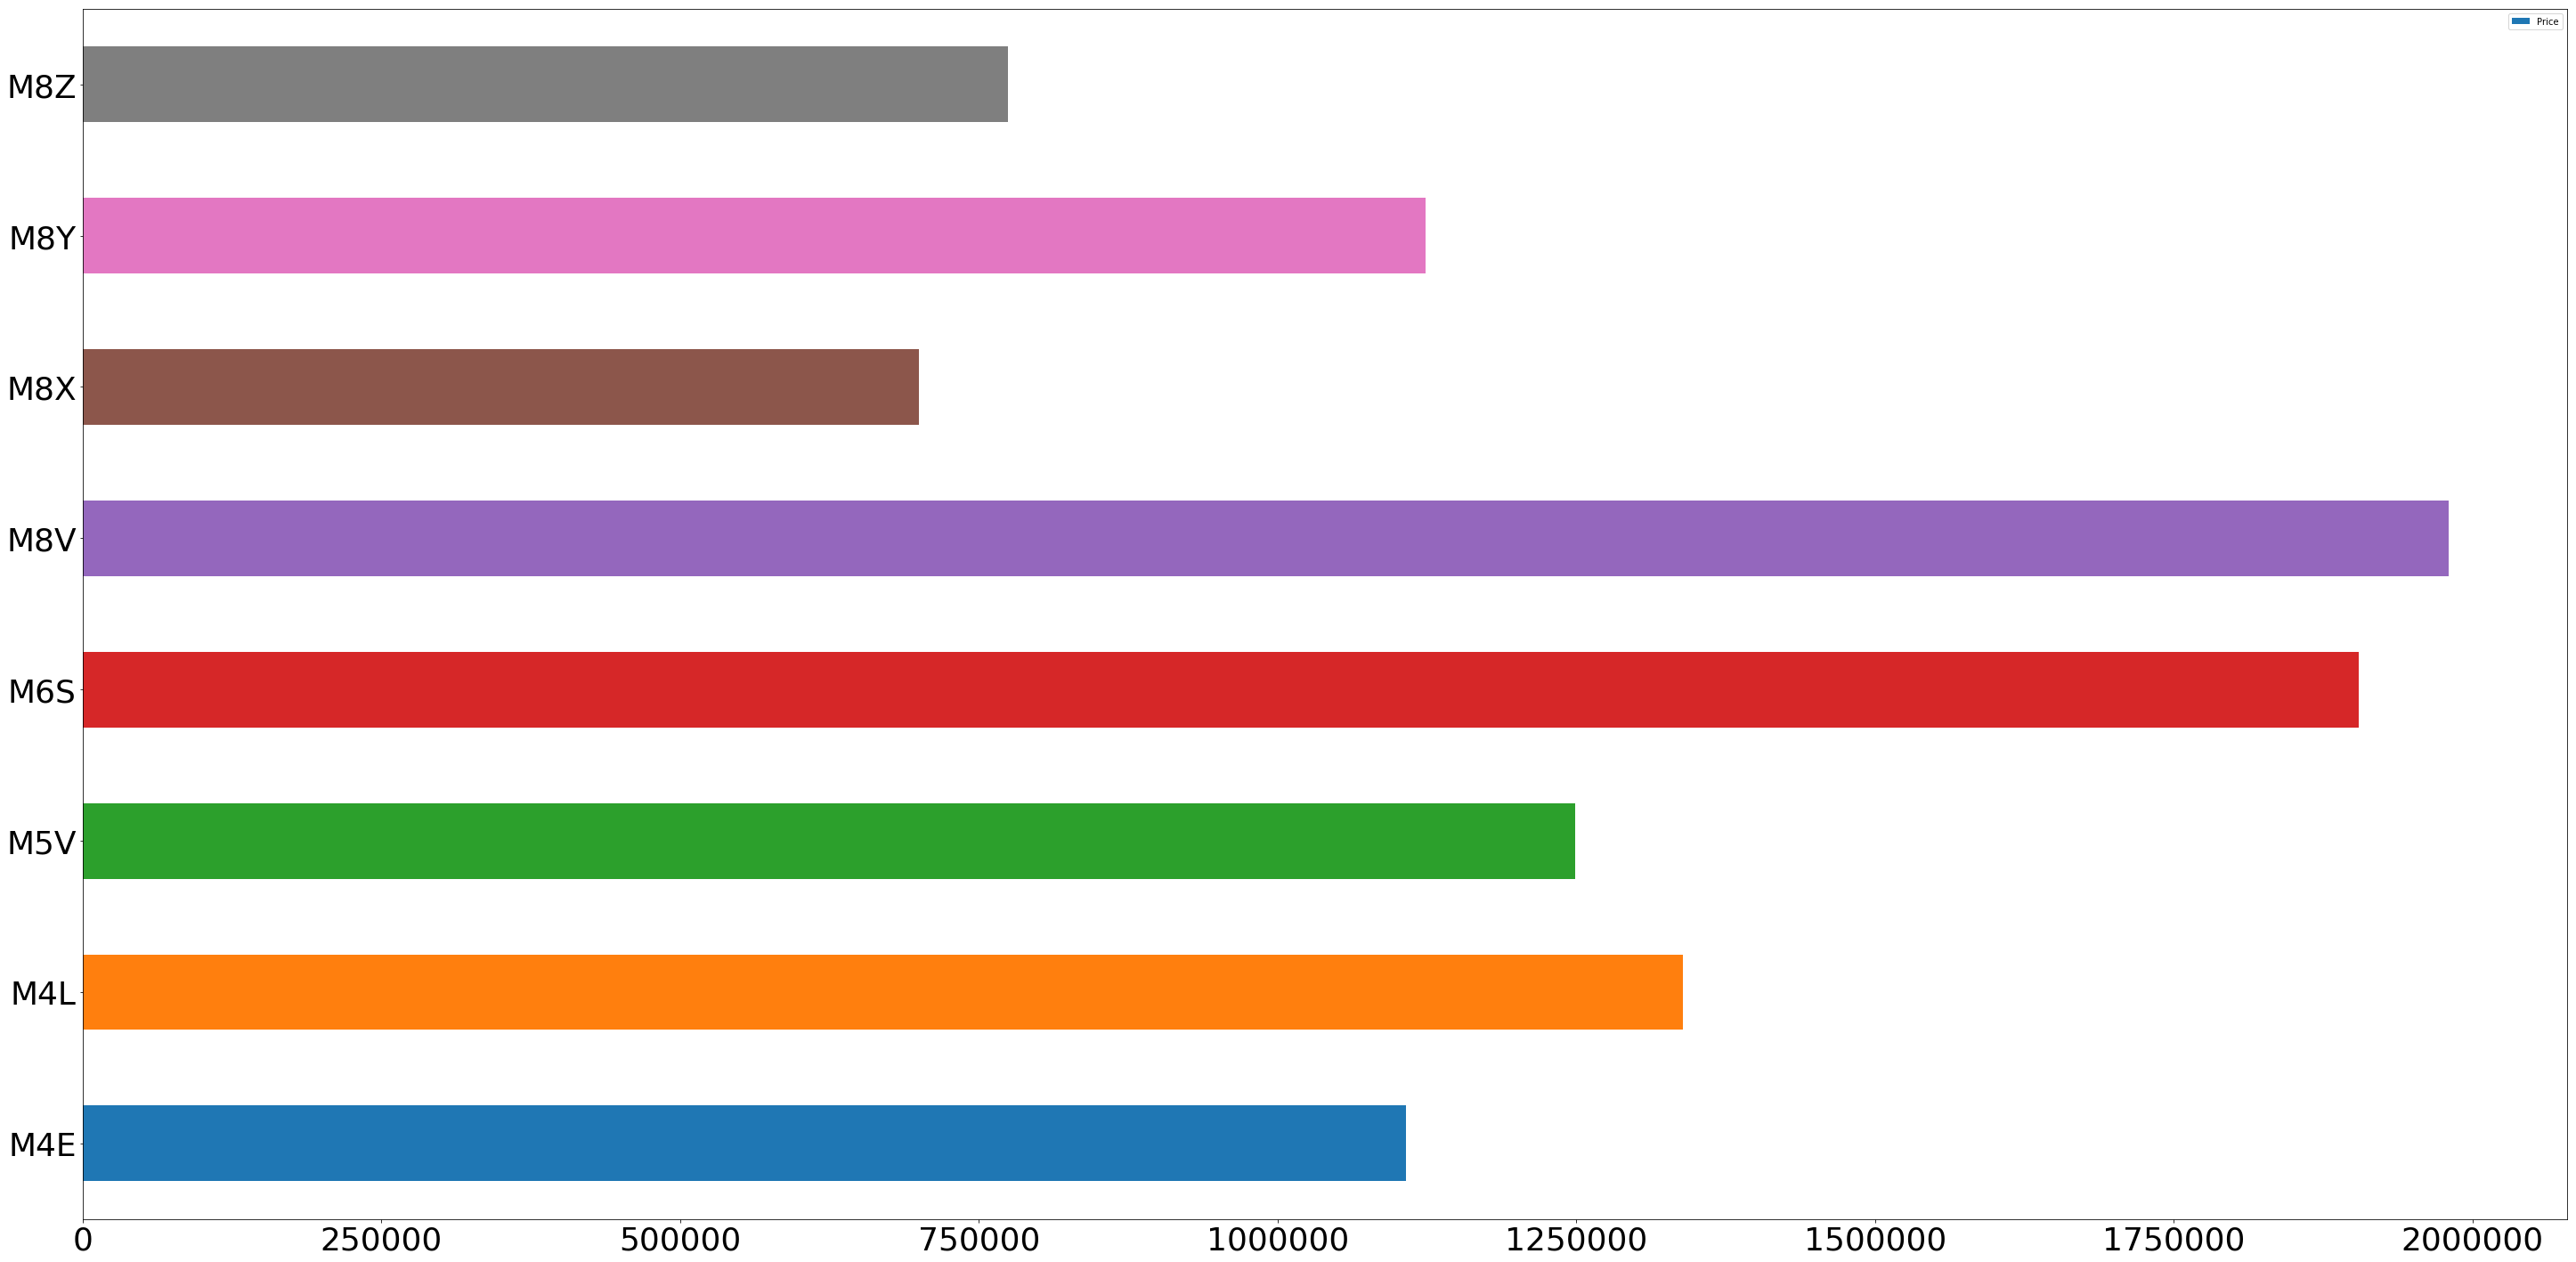

In [24]:
Median_Cluster6.plot.barh(y='Price', figsize=(50,25), fontsize=36)

### Adding Median Price column to Cluster6 Dataframe

In [25]:
median_cluster6_list = []

for postal in Cluster6['Postal Code'].tolist():
    
    if postal in Median_Cluster6.index.tolist():
        median_cluster6_list.append(Median_Cluster6[Median_Cluster6.index==postal]['Price'].values[0])
    else:
        median_cluster6_list.append(np.nan)
        
Cluster6.insert(2,column='Median Price', value=median_cluster6_list)
Cluster6

,Cluster Labels,Postal Code,Median Price,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,5,M4E,1107495.0,Beach,Coffee Shop,Pub,Park,Breakfast Spot,Ice Cream Shop,BBQ Joint,Indian Restaurant,Bakery,Bar
7,5,M4G,NaN,Park,Indian Restaurant,Bakery,Grocery Store,Sushi Restaurant,Coffee Shop,Café,Gym,Dog Run,Thai Restaurant
10,5,M4L,1339000.0,Coffee Shop,Park,Beach,Café,Brewery,Bakery,Indian Restaurant,Pizza Place,Ice Cream Shop,American Restaurant
34,5,M5V,1249000.0,Park,Hotel,Coffee Shop,Brewery,Italian Restaurant,Dessert Shop,Japanese Restaurant,Beer Bar,Café,Caribbean Restaurant
45,5,M6S,1905000.0,Italian Restaurant,Bar,Bakery,Café,Park,Coffee Shop,Liquor Store,Dog Run,Seafood Restaurant,Scenic Lookout
47,5,M8V,1980000.0,Restaurant,Park,Coffee Shop,Sushi Restaurant,Breakfast Spot,Italian Restaurant,Pizza Place,Bakery,Café,Indian Restaurant
49,5,M8X,699900.0,Italian Restaurant,Bakery,Café,Coffee Shop,Sushi Restaurant,Burger Joint,Pub,Pizza Place,Thai Restaurant,Liquor Store
50,5,M8Y,1124000.0,Sushi Restaurant,Coffee Shop,Italian Restaurant,Bakery,Café,Park,Thai Restaurant,Liquor Store,Burrito Place,Scenic Lookout
51,5,M8Z,773999.5,Coffee Shop,Italian Restaurant,Bakery,Burger Joint,Restaurant,Sushi Restaurant,Ice Cream Shop,Pizza Place,Thai Restaurant,Breakfast Spot


It seens the price of M4E, M5V, M8X, M8Y, M8Z is more likely under my expectation

### List all the estates in cluster 6 that the price is under my expectation
I am able to searching the details of the listed estates

In [27]:
Targeted_Est_Cluster6 = Est_Cluster6[Est_Cluster6.Price < 1200000]
Targeted_Est_Cluster6

,Postal Code,Address,Bedroom,Bathroom,Price,Latitude,Longitude
1,M4E,288 Silver Birch Ave,3,2,879900,43.679220,-79.287836
3,M4E,30 Carnahan Terr,3,3,798800,43.687533,-79.291661
4,M4E,68 Daisy Ave E,3,2,1014990,43.597348,-79.529025
6,M4L,107 - 90 Edgewood Ave,3,2,678800,43.672804,-79.314750
9,M4L,2194 Wedgewood Rd,3,2,949900,43.588921,-79.587165
10,M4L,1835 Gerrard St E,3,3,1089000,43.678838,-79.313718
11,M4L,60 Glenmore Rd,3,2,929000,43.677410,-79.310765
12,M4L,305 - 1733 Queen St E,3,2,849900,43.667435,-79.311033
18,M4L,603 - 507 Kingston Rd,3,3,981815,43.677334,-79.302723
22,M5V,905 - 90 Queens Wharf Rd,3,2,999999,43.638642,-79.399078
